<a href="https://colab.research.google.com/github/ferreiraluisa/faculdade/blob/main/luisa102026lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalar Verilog Plugin

Executar o comando abaixo.

In [ ]:
!pip install git+git://github.com/canesche/nvcc4jupyter.git
!git clone https://github.com/canesche/nvcc4jupyter
%load_ext nvcc_plugin

  Cloning git://github.com/canesche/nvcc4jupyter.git to /tmp/pip-req-build-47makp69
  Running command git clone -q git://github.com/canesche/nvcc4jupyter.git /tmp/pip-req-build-47makp69
  Created wheel for ColabPlugin: filename=ColabPlugin-0.0.3-cp36-none-any.whl size=12310 sha256=3820016a19253790bd6d3f5fa11136f52af2ca572450d599a639b188e807d718
  Stored in directory: /tmp/pip-ephem-wheel-cache-mybcros1/wheels/87/ae/09/21c6e192181a0472e20ddd1d5212e2cbb113f00ebe14330d0d
Successfully built ColabPlugin
Cloning into 'nvcc4jupyter'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 489 (delta 30), reused 33 (delta 16), pack-reused 440
Receiving objects: 100% (489/489), 27.67 MiB | 16.00 MiB/s, done.
Resolving deltas: 100% (239/239), done.
created output directory at /content/src
Out bin /content/result.out


# Exemplo 1 - Codificador/Decodificador de Prioridade

Um decodificador ou codificador de prioridade (*priority encoder*) tem M entradas, onde M é, em geral, uma potência de 2, ou seja, $M=2^n$. Quando uma das entradas é acionada, a saída com $n$ bits irá informar o número da entrada. Por exemplo se temos 4 entradas $X_3 X_2 X_1 X_0$, a entrada $X_2$ é acionada, ou seja, temos $0100$ na entrada. A saída será o número 2, ou, o código $10$.
Para saber mais, consulte a [wikipedia](https://en.wikipedia.org/wiki/Priority_encoder).


Supondo 4 entradas, precisamos de apenas 2 bits para informar qual entrada foi acionada. Abaixo uma descrição com a tabela verdade.

In [ ]:
%%verilog 
module test(
		input [3:0]x, // definir as entradas
    output  reg [1:0] z  // definir as saidas
    );
always @ *
  case (x) 
		4'b0001: z = 0;
		4'b0010: z = 1;
	  4'b0100: z = 2; 
		4'b1000: z = 3;
	endcase


endmodule



module logic_testbench();  // Esta parte do codigo é para gerar os 16 valores
reg [3:0] counter;
wire [1:0] z;
integer k;
	test t(counter,z); 
	initial begin
		$display("x3210 | z");
		$monitor("%4b | %d", counter,  z);
		counter = 0;
		for (k=1; k<16; k=k+1)
     #1 counter = k;
		$finish;
	end
endmodule

x3210 | z
0000 | x
0001 | 0
0010 | 1
0011 | 1
0100 | 2
0101 | 2
0110 | 2
0111 | 2
1000 | 3
1001 | 3
1010 | 3
1011 | 3
1100 | 3
1101 | 3
1110 | 3
1111 | 3



# Exercicio 1- Verificar a  implementação com portas lógicas

Abaixo temos três implementações do priority encoder. Criar um módulo para cada uma delas e testar.

Modulo para primeira implementação. Entrada $I_3...I_0$ e saídas $O_1O_0$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fb/A_Simple_4-2_encoder_using_or_gate.jpg/318px-A_Simple_4-2_encoder_using_or_gate.jpg)

Segunda implementação. Entradas $X_i$, saídas $Y_i$. A primeira porta NAND ligada a $X_0$ pode ser retirada, pois não está conectada a nada.
![](https://tams.informatik.uni-hamburg.de/applets/hades/webdemos/10-gates/45-priority/priority42.gif)

Terceira implementação que tem uma saída extra para diferenciar o código 0000 na entrada, onde nenhuma entrada está ativa, do código 0001, onde a entrada $I_0$ está ativa.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/A_4-2_Priority_Encoder_.jpg/486px-A_4-2_Priority_Encoder_.jpg)


In [ ]:
%%verilog 
module primeira(
		input  [3:0]I, // definir as entradas
    output [1:0] O  // definir as saidas
    );
// COMPLETAR AQUI ....
assign O[0] = I[1] | I[3];
assign O[1] = I[2] | I[3];

endmodule

module segunda(
		input  [3:0]x, // definir as entradas
    output [1:0] y  // definir as saidas
    );
// COMPLETAR AQUI ....
wire a,b;
assign a = ~(~x[3]&x[2]);
assign b = ~(a & ~x[3] & x[1]);
assign y[1] = x[3] | ~a;
assign y[0] = x[3] | ~b;



endmodule

module terceira(
		input  [3:0]x, // definir as entradas
    output [1:0] y,  // definir as saidas
		output v
    );
// COMPLETAR AQUI ....
wire a;
assign a = ~x[2] & x[1];
assign y[0] = a | x[3];
assign y[1] = x[3] | x[2];
assign v = y[1] | x[1] | x[0];
endmodule

module solucao(
		input [3:0]x, // definir as entradas
    output  reg [1:0] z  // definir as saidas
    );
always @ *
  case (x)
	  4'b0000: z = 0; 
		4'b0001: z = 0;
		4'b0010: z = 1;
	  4'b0100: z = 2; 
		4'b1000: z = 3;
	endcase
endmodule


module logic_testbench();  // Esta parte do codigo é para gerar os 16 valores
reg [3:0] counter;
wire [1:0] y1,y2,y3,s;
wire v;
integer k;
	primeira t(counter,y1);
  segunda t2(counter,y2);
	terceira t3(counter,y3,v);
  solucao S(counter,s);
	initial begin
		$display("x3210 | Primeira  Segunda Terceira v Solucao Tabela");
		$monitor(" %4b |      %d       %d        %d    %b       %d", counter,  y1, y2, y3, v, s);
		counter = 0;
		for (k=1; k<16; k=k+1)
     #1 counter = k;
		$finish;
	end
endmodule

x3210 | Primeira  Segunda Terceira v Solucao Tabela
 0000 |      0       0        0    0       0
 0001 |      0       0        0    1       0
 0010 |      1       1        1    1       1
 0011 |      1       1        1    1       1
 0100 |      2       2        2    1       2
 0101 |      2       2        2    1       2
 0110 |      3       2        2    1       2
 0111 |      3       2        2    1       2
 1000 |      3       3        3    1       3
 1001 |      3       3        3    1       3
 1010 |      3       3        3    1       3
 1011 |      3       3        3    1       3
 1100 |      3       3        3    1       3
 1101 |      3       3        3    1       3
 1110 |      3       3        3    1       3
 1111 |      3       3        3    1       3



A tabela verdade do priority encoder ou codificador de prioridade é definida como 

I3 | I2 | I1 | I1 | $O_1O_0$ | V  
---|---|---|---|---|---
0 | 0 | 0 | 0 | XX | 0
0 | 0 | 0 | 1 | 0 | 1
0 | 0 | 1 | 0 | 1 | 1
0 | 1 | 0 | 0 | 2 | 1
1 | 0 | 0 | 0 | 3 | 1





## Exercicio 2 

Um decodificador de prioridade com 8 entradas [foi projetado neste link](https://www.electronics-tutorials.ws/combination/comb_4.html).
Com 8 entradas, temos 256 linhas na tabela verdade. 
Teremos 3 bits de saídas para sinalizar de 0 a 7, qual entrada foi acionada. Verifique que se as equações minimizadas estão corretas.

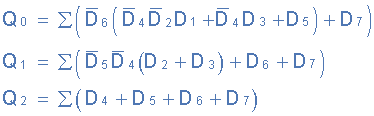

In [ ]:
%%verilog 
module encoder(
		input  [7:0]d, // definir as entradas
    output [2:0] q  // definir as saidas
    );
// COMPLETAR AQUI ....
assign q[0] = ((~d[6] & (~d[4]&~d[2]&d[1] | (~d[4]&d[3]) | d[5])) | d[7]);
assign q[1] = ((~d[5]&~d[4]) & (d[2]|d[3]) |d[6] | d[7]);
assign q[2] = d[4] | d[5] | d[6] | d[7];


endmodule

module solution(
		input [7:0]x, // definir as entradas
    output  reg [2:0] z  // definir as saidas
    );
always @ *
  case (x)
	  8'b00000000: z = 0; 
		8'b00000001: z = 0;
		8'b00000010: z = 1;
	  8'b00000100: z = 2; 
		8'b00001000: z = 3;
		8'b00010000: z = 4;
		8'b00100000: z = 5;
		8'b01000000: z = 6;
		8'b10000000: z = 7;
	endcase
endmodule



module logic_testbench();  // Esta parte do codigo é para gerar os 16 valores
reg [7:0] counter;
wire [2:0] q,s;
integer k;
	encoder t(counter,q);
	solution S(counter,s); 
	initial begin
		$display("x76543210 |  Sua Sol.    Correcao");
		$monitor(" %8b |      %d         %d", counter,  q,s);
		counter = 0;
		for (k=1; k<256; k=k<<1)
     #1 counter = k;
		$finish;
	end
endmodule

x76543210 |  Sua Sol.    Correcao
 00000000 |      0         0
 00000001 |      0         0
 00000010 |      1         1
 00000100 |      2         2
 00001000 |      3         3
 00010000 |      4         4
 00100000 |      5         5
 01000000 |      6         6
 10000000 |      7         7



# Exercicio 3 -  Multiplexador

O multiplexador é um circuito que faz a seleção entre duas ou mais opções. O multiplexador 2:1 irá escolher entre duas opções. O 4:1 irá selecionar com 4 entradas de dados e duas de seleção. Você irá fazer duas tarefas para construir um multiplexador que recebe 4 entradas de 4 bits cada.

![](https://i.stack.imgur.com/896GB.png)

Primeiro iremos montar um multiplexador 4:1 com portas ou equações lógicas. Montar o módulo mux41 (desenhe de baixo).

![](https://tams.informatik.uni-hamburg.de/applets/hades/webdemos/10-gates/40-mux-demux/mux21-mux41.gif)


Depois, usando a técnica de bitslice, montar o multiplexador 4:1 com 4 entradas de 4 bits cada. Voce irá preencher com os 4 ultimos dígitos de matrícula e a saída mostrará os 4 últimos digitos.

![](https://i.stack.imgur.com/g1X1f.png)


In [ ]:
%%verilog 
module mux41(i3,i2,i1,i0,s1,s0,y);
input i3,i2,i1,i0,s1,s0;
output y;
// COMPLETAR AQUI....
wire a,b;
assign y = (s1)?a:b;
assign a = (s0)?i3:i2;
assign b = (s0)?i1:i0;

endmodule


module mux41_4bits(input [3:0]I3, input [3:0]I2,input [3:0]I1,input [3:0]I0,input [1:0]s, output [3:0]O);
// COMPLETAR AQUI ....
mux41 a0(I3[0],I2[0],I1[0],I0[0],s[1],s[0],O[0]);
mux41 a1(I3[1],I2[1],I1[1],I0[1],s[1],s[0],O[1]);
mux41 a2(I3[2],I2[2],I1[2],I0[2],s[1],s[0],O[2]);
mux41 a3(I3[3],I2[3],I1[3],I0[3],s[1],s[0],O[3]);


endmodule




module logic_testbench();  
reg [3:0] D3,D2,D1,D0;
wire [3:0] D;
reg [1:0] s;
integer k;
	mux41_4bits M(D3,D2,D1,D0,s,D); 
	initial begin
		$display("sel | digito");
		$monitor(" %d  | %d", s, D);
		D3 = 2; D2 = 0; D1= 2; D0 = 6; // minha matricula eh 102026
		s = 3;
     #1 s=2;
		 #1 s=1;
		 #1 s=0;
		$finish;
	end
endmodule

sel | digito
 3  |  2
 2  |  0
 1  |  2
 0  |  6



# Exercicio 4

Outro circuito é o decodificador que converter um código de $n$ bits em um código de $2^n$ bits. Por exemplo, com 2 bits teremos 0,1,2,3 sendo convertidos em 0001, 0010, 0100, 1000. Ou seja, cada código aciona a saída com seu número. A figura a seguir mostra um decoder de 2:4 

![](https://i.stack.imgur.com/jWxOF.png)

Outra opção é ter uma entrada extra para habilitar ou não o decodificador. Assim, se a entrada en=0, todas as saídas serão 0. Se en=1, a saída selecionada será verdadeira e todas as outras falsas.

![](https://media.cheggcdn.com/study/1c9/1c9a2999-c326-484a-9521-d4c2d92fb9a0/616068-3-29IP1.png)



Construa um decoder 4:2 com entrada de EN.


In [ ]:
%%verilog 
module decoder24(en,a,d);
input en;
input [1:0]a;
output [3:0] d;
// COMPLETAR AQUI....
assign d[0] = en & (~a[1] & ~a[0]);
assign d[1] = en & (~a[1] & a[0]);
assign d[2] = en & (a[1] & ~a[0]);
assign d[3] = en & (a[1] & a[0]);
endmodule



module logic_testbench();  
reg [2:0] counter;
wire [3:0] D;
integer k;
	decoder24 M(counter[2],counter[1:0],D); 
	initial begin
		$display("en A1A0 | z");
		$monitor("%b  %d | %4b", counter[2], counter[1:0], D);
		counter = 0;
		for (k=1; k<8; k=k+1)
     #1 counter = k;
		$finish;
	end
	
endmodule

en A1A0 | z
0  0 | 0000
0  1 | 0000
0  2 | 0000
0  3 | 0000
1  0 | 0001
1  1 | 0010
1  2 | 0100
1  3 | 1000



# Exercicio 5

Construa um decoder 3:8, Use $a_2$ como x, $a_1$ como y, $a_0$ como z.

![](https://static.planetminecraft.com/files/resource_media/screenshot/1910/3-to-8-binary-decoder-00-1551699806.jpg)

In [ ]:
%%verilog 
module decoder38(a,d);
input [2:0]a;
output [7:0] d;
// COMPLETAR AQUI....
assign d[0] = ~a[0] & ~a[1] & ~a[2];
assign d[1] = a[0] & ~a[1] & ~a[2];
assign d[2] = ~a[0] & a[1] & ~a[2]; 
assign d[3] = a[0] & a[1] & ~a[2];
assign d[4] = ~a[0] & ~a[1] & a[2];
assign d[5] = a[0] & ~a[1] & a[2];
assign d[6] = ~a[0] & a[1] & a[2];
assign d[7] = a[0] & a[1] & a[2];


endmodule



module logic_testbench();  
reg [2:0] counter;
wire [7:0] D;
integer k;
	decoder38 M(counter[2:0],D); 
	initial begin
		$display("A2A1A0 | z");
		$monitor("%d | %8b", counter, D);
		counter = 0;
		for (k=1; k<8; k=k+1)
     #1 counter = k;
		$finish;
	end
	
endmodule

A2A1A0 | z
0 | 00000001
1 | 00000010
2 | 00000100
3 | 00001000
4 | 00010000
5 | 00100000
6 | 01000000
7 | 10000000



# Exercicio 6

Agora iremos fazer uma transmissão usando um encoder e um decoder. 

![](https://www.watelectronics.com/wp-content/uploads/encoder-and-decoder-300x150.jpg)

Suponha que na entrada A temos 8 alarmes. O Encoder irá compactar em código binário com 3 bits, enviar as saidas $O_2O_1O_0$ para o **decoder** que irá receber em **A** e mostrar em **O** qual alarme foi acionado.
Monte o circuito acima usando o encoder do exercicio 2 e o decoder do exercicio 5.

In [ ]:
%%verilog 
module decoder38(a,d);
input [2:0]a;
output [7:0] d;
// COMPLETAR AQUI....
assign d[0] = ~a[0] & ~a[1] & ~a[2];
assign d[1] = a[0] & ~a[1] & ~a[2];
assign d[2] = ~a[0] & a[1] & ~a[2]; 
assign d[3] = a[0] & a[1] & ~a[2];
assign d[4] = ~a[0] & ~a[1] & a[2];
assign d[5] = a[0] & ~a[1] & a[2];
assign d[6] = ~a[0] & a[1] & a[2];
assign d[7] = a[0] & a[1] & a[2];
endmodule

module encoder(
		input  [7:0]d, // definir as entradas
    output [2:0] q  // definir as saidas
    );
// COMPLETAR AQUI....
assign q[0] = ((~d[6] & (~d[4]&~d[2]&d[1] | (~d[4]&d[3]) | d[5])) | d[7]);
assign q[1] = ((~d[5]&~d[4]) & (d[2]|d[3]) |d[6] | d[7]);
assign q[2] = d[4] | d[5] | d[6] | d[7];
endmodule

module conexao(input [7:0] D, output [7:0] O);
// COMPLETAR AQUI....
wire [2:0]q;
assign q[0] = ((~D[6] & (~D[4]&~D[2]&D[1] | (~D[4]&D[3]) | D[5])) | D[7]);
assign q[1] = ((~D[5]&~D[4]) & (D[2]|D[3]) |D[6] | D[7]);
assign q[2] = D[4] | D[5] | D[6] | D[7];
assign O[0] = ~q[0] & ~q[1] & ~q[2];
assign O[1] = q[0] & ~q[1] & ~q[2];
assign O[2] = ~q[0] & q[1] & ~q[2]; 
assign O[3] = q[0] & q[1] & ~q[2];
assign O[4] = ~q[0] & ~q[1] & q[2];
assign O[5] = q[0] & ~q[1] & q[2];
assign O[6] = ~q[0] & q[1] & q[2];
assign O[7] = q[0] & q[1] & q[2];

endmodule


module logic_testbench();  
reg [7:0] counter;
wire [7:0] D;
integer k;
	conexao M(counter,D); 
	initial begin
		$display(" In      | Out");
		$monitor("%8b | %8b", counter, D);
		counter = 1;
		for (k=2; k<256; k=k<<1)
     #1 counter = k;
		$finish;
	end
	
endmodule

 In      | Out
00000001 | 00000001
00000010 | 00000010
00000100 | 00000100
00001000 | 00001000
00010000 | 00010000
00100000 | 00100000
01000000 | 01000000
10000000 | 10000000



# Exemplo 2

Arvores de multiplexadores com Mux2:1 podemos fazer mux com 2, 3, ..., N entradas. Abaixo a solução para 2,3,4,5 e 6. 

![](http://1.bp.blogspot.com/-d7TJekGkpU0/T_MbkQ_q0LI/AAAAAAAAADo/vKM9-SE3QM4/s640/mux.png)

Alem da arvore de multiplixadores, temos que fazer a conexão correta das entradas de seleção.

Abaixo um exemplo de um mux 5:1.


In [ ]:
%%verilog

module mux21(a,s,o);
input [1:0]a;
input s;
output  o;
assign o = (s)?a[1]:a[0];
endmodule

module mux51(a,s,o);
input [4:0]a;
input [2:0]s;
output  o;
wire o01,o23,o0123;
mux21 m01(a[1:0],s[0],o01);
mux21 m23(a[3:2],s[0],o23);
mux21 m0123({o23,o01},s[1],o0123);
mux21 m01234({a[4],o0123},s[2],o);
endmodule



module logic_testbench();  
reg [4:0] In;
reg [2:0] counter;
wire D;
integer k,i;
	mux51 M(In,counter,D); 
	initial begin
		$display(" In   sel   | Out");
		$monitor("%5b   %d | %b", In, counter, D);
		counter = 0; i = 1;
		for (k=0; k<8; k++)
	   begin
     #1 counter = k; In=i; i=i<<1;
		 end  
		$finish;
	end
	
endmodule

 In   sel   | Out
xxxxx   0 | x
00001   0 | 1
00010   1 | 1
00100   2 | 1
01000   3 | 1
10000   4 | 1
00000   5 | 0
00000   6 | 0
00000   7 | 0



# Exercicio 8 

Fazer um mux 7:1.

In [ ]:
%%verilog

module mux21(a,s,o);
input [1:0]a;
input s;
output  o;
assign o = (s)?a[1]:a[0];
endmodule

module mux71(a,s,o);
input [6:0]a;
input [2:0]s;
output  o;
wire o01,o23,o45,o0123,o456;
mux21 m01(a[1:0],s[0],o01);
mux21 m23(a[3:2],s[0],o23);
mux21 m45(a[5:4],s[0],o45);
mux21 m0123({o23,o01},s[1],o0123);
mux21 m456({a[6],o45},s[1],o456);
mux21 m0123456({o456,o0123},s[2],o);
// COMPLETAR AQUI...

endmodule


module logic_testbench();  
reg [6:0] In;
reg [2:0] counter;
wire D;
integer k,i;
	mux71 M(In,counter,D); 
	initial begin
		$display(" In   sel   | Out");
		$monitor("%7b   %d | %b", In, counter, D);
		counter = 0; i = 1;
		for (k=0; k<8; k++)
	   begin
     #1 counter = k; In=i; i=i<<1;
		 end  
		$finish;
	end
	
endmodule

 In   sel   | Out
xxxxxxx   0 | x
0000001   0 | 1
0000010   1 | 1
0000100   2 | 1
0001000   3 | 1
0010000   4 | 1
0100000   5 | 1
1000000   6 | 1
0000000   7 | 0

